In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Create target directory
target_dir = "/content/COMP9444"
os.makedirs(target_dir, exist_ok=True)

# Extract .tar file
tar_path = "/content/drive/MyDrive/COMP9444/ip102_v1.1.tar"
!tar -xvf {tar_path} -C {target_dir}

print("Extraction completed successfully! Files are now in:", target_dir)

流式输出内容被截断，只能显示最后 5000 行内容。
ip102_v1.1/images/37602.jpg
ip102_v1.1/images/70469.jpg
ip102_v1.1/images/16234.jpg
ip102_v1.1/images/63735.jpg
ip102_v1.1/images/09500.jpg
ip102_v1.1/images/42367.jpg
ip102_v1.1/images/07241.jpg
ip102_v1.1/images/31200.jpg
ip102_v1.1/images/35633.jpg
ip102_v1.1/images/18698.jpg
ip102_v1.1/images/14265.jpg
ip102_v1.1/images/54742.jpg
ip102_v1.1/images/33374.jpg
ip102_v1.1/images/59373.jpg
ip102_v1.1/images/59028.jpg
ip102_v1.1/images/33029.jpg
ip102_v1.1/images/02900.jpg
ip102_v1.1/images/61766.jpg
ip102_v1.1/images/07531.jpg
ip102_v1.1/images/40398.jpg
ip102_v1.1/images/26640.jpg
ip102_v1.1/images/05272.jpg
ip102_v1.1/images/33664.jpg
ip102_v1.1/images/12296.jpg
ip102_v1.1/images/52773.jpg
ip102_v1.1/images/52428.jpg
ip102_v1.1/images/57059.jpg
ip102_v1.1/images/00931.jpg
ip102_v1.1/images/72080.jpg
ip102_v1.1/images/24671.jpg
ip102_v1.1/images/28759.jpg
ip102_v1.1/images/24326.jpg
ip102_v1.1/images/69434.jpg
ip102_v1.1/images/65001.jpg
ip102_v1.1/images/480

In [ ]:
import os

# Set the path to the image folder
image_dir = '/content/COMP9444/ip102_v1.1/images'

# Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

# Traverse and count image files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(image_extensions)]

print(f"Total number of images: {len(image_files)}")

Total number of images: 75222


In [ ]:
import os
import shutil

# Path Configuration
colab_base = "/content/COMP9444/ip102_v1.1"
drive_base = "/content/drive/MyDrive/COMP9444"
project_base = "/content/COMP9444/COMP9444IP102_project"

# Subdirectory Structure
folders = [
    "images",
    "annotations",
    "pretrained_models",
    "notebooks",
    "outputs"
]

# Create Folder Structure
for folder in folders:
    full_path = os.path.join(project_base, folder)
    os.makedirs(full_path, exist_ok=True)
    print(f"Created directory: {full_path}")

# Copy images
original_image_dir = os.path.join(colab_base, "images")
target_image_dir = os.path.join(project_base, "images")
shutil.copytree(original_image_dir, target_image_dir, dirs_exist_ok=True)
print(f"Copied images to: {target_image_dir}")

# Copy Pretrained Model from Google Drive
original_model = os.path.join(drive_base, "resnet50_0.497.pkl")
target_model_dir = os.path.join(project_base, "pretrained_models")
shutil.copy(original_model, target_model_dir)
print(f"Copied pretrained model to: {target_model_dir}")

# Copy Annotation Files (train/val/test)
annotation_files = [
    os.path.join(drive_base, "train.txt"),
    os.path.join(drive_base, "val.txt"),
    os.path.join(drive_base, "test.txt")
]
target_ann_dir = os.path.join(project_base, "annotations")

for file in annotation_files:
    if os.path.exists(file):
        shutil.copy(file, target_ann_dir)
        print(f"Copied annotation file: {os.path.basename(file)} to {target_ann_dir}")
    else:
        print(f"Missing file: {file}")

# Copy classes.txt
classes_file = os.path.join(drive_base, "classes.txt")
if os.path.exists(classes_file):
    shutil.copy(classes_file, target_ann_dir)
    print(f"Copied classes.txt to {target_ann_dir}")
else:
    print(f"Missing file: {classes_file}")

print("All folders and files have been organized. You can now start building your model.")

Created directory: /content/COMP9444/COMP9444IP102_project/images
Created directory: /content/COMP9444/COMP9444IP102_project/annotations
Created directory: /content/COMP9444/COMP9444IP102_project/pretrained_models
Created directory: /content/COMP9444/COMP9444IP102_project/notebooks
Created directory: /content/COMP9444/COMP9444IP102_project/outputs
Copied images to: /content/COMP9444/COMP9444IP102_project/images
Copied pretrained model to: /content/COMP9444/COMP9444IP102_project/pretrained_models
Copied annotation file: train.txt to /content/COMP9444/COMP9444IP102_project/annotations
Copied annotation file: val.txt to /content/COMP9444/COMP9444IP102_project/annotations
Copied annotation file: test.txt to /content/COMP9444/COMP9444IP102_project/annotations
Copied classes.txt to /content/COMP9444/COMP9444IP102_project/annotations
All folders and files have been organized. You can now start building your model.


Total number of classes: 102
Example classes (first 10):
 0: 1  rice leaf roller
 1: 2  rice leaf caterpillar
 2: 3  paddy stem maggot
 3: 4  asiatic rice borer
 4: 5  yellow rice borer
 5: 6  rice gall midge
 6: 7  Rice Stemfly
 7: 8  brown plant hopper
 8: 9  white backed plant hopper
 9: 10 small brown plant hopper


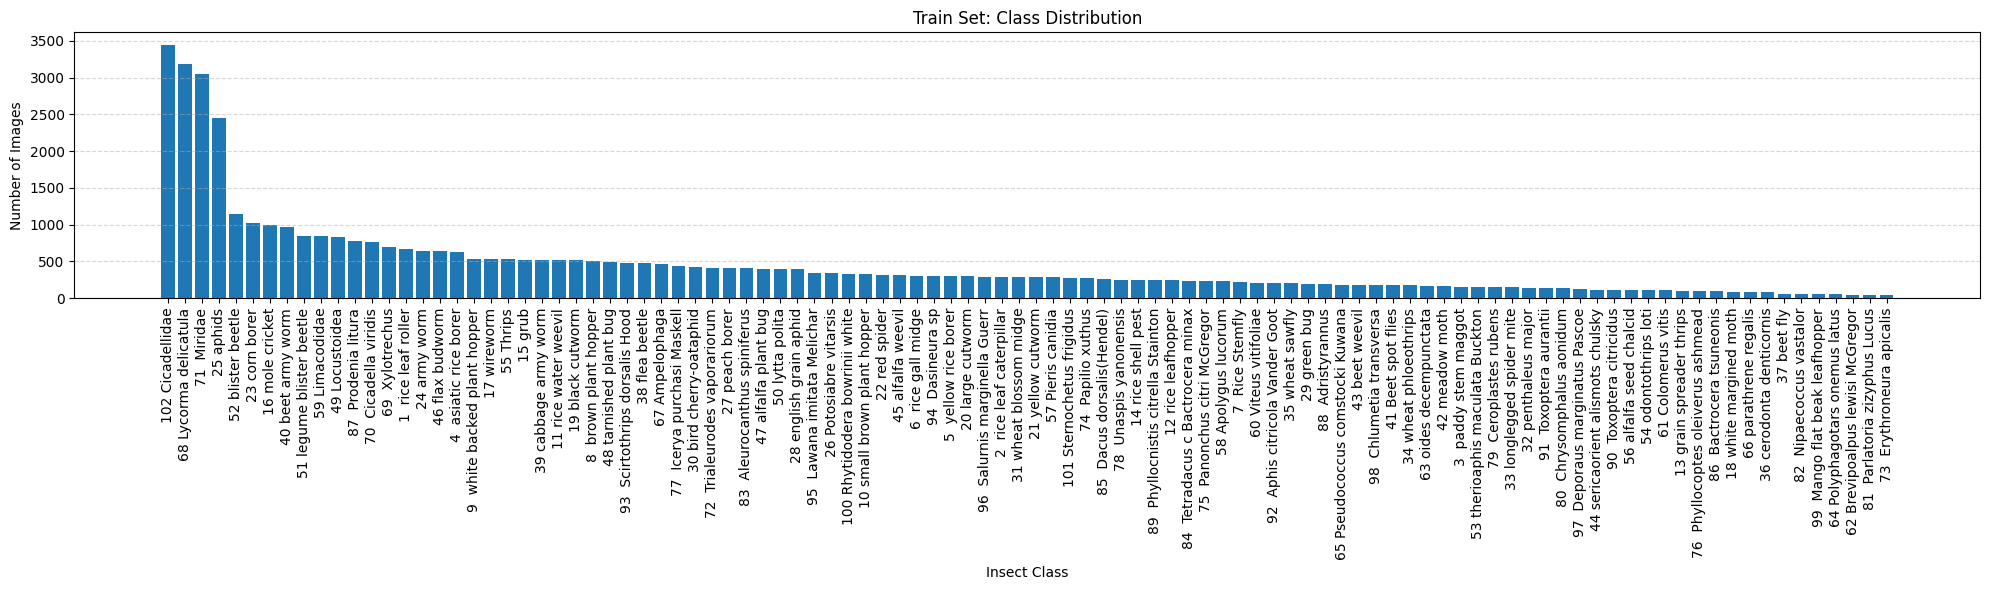

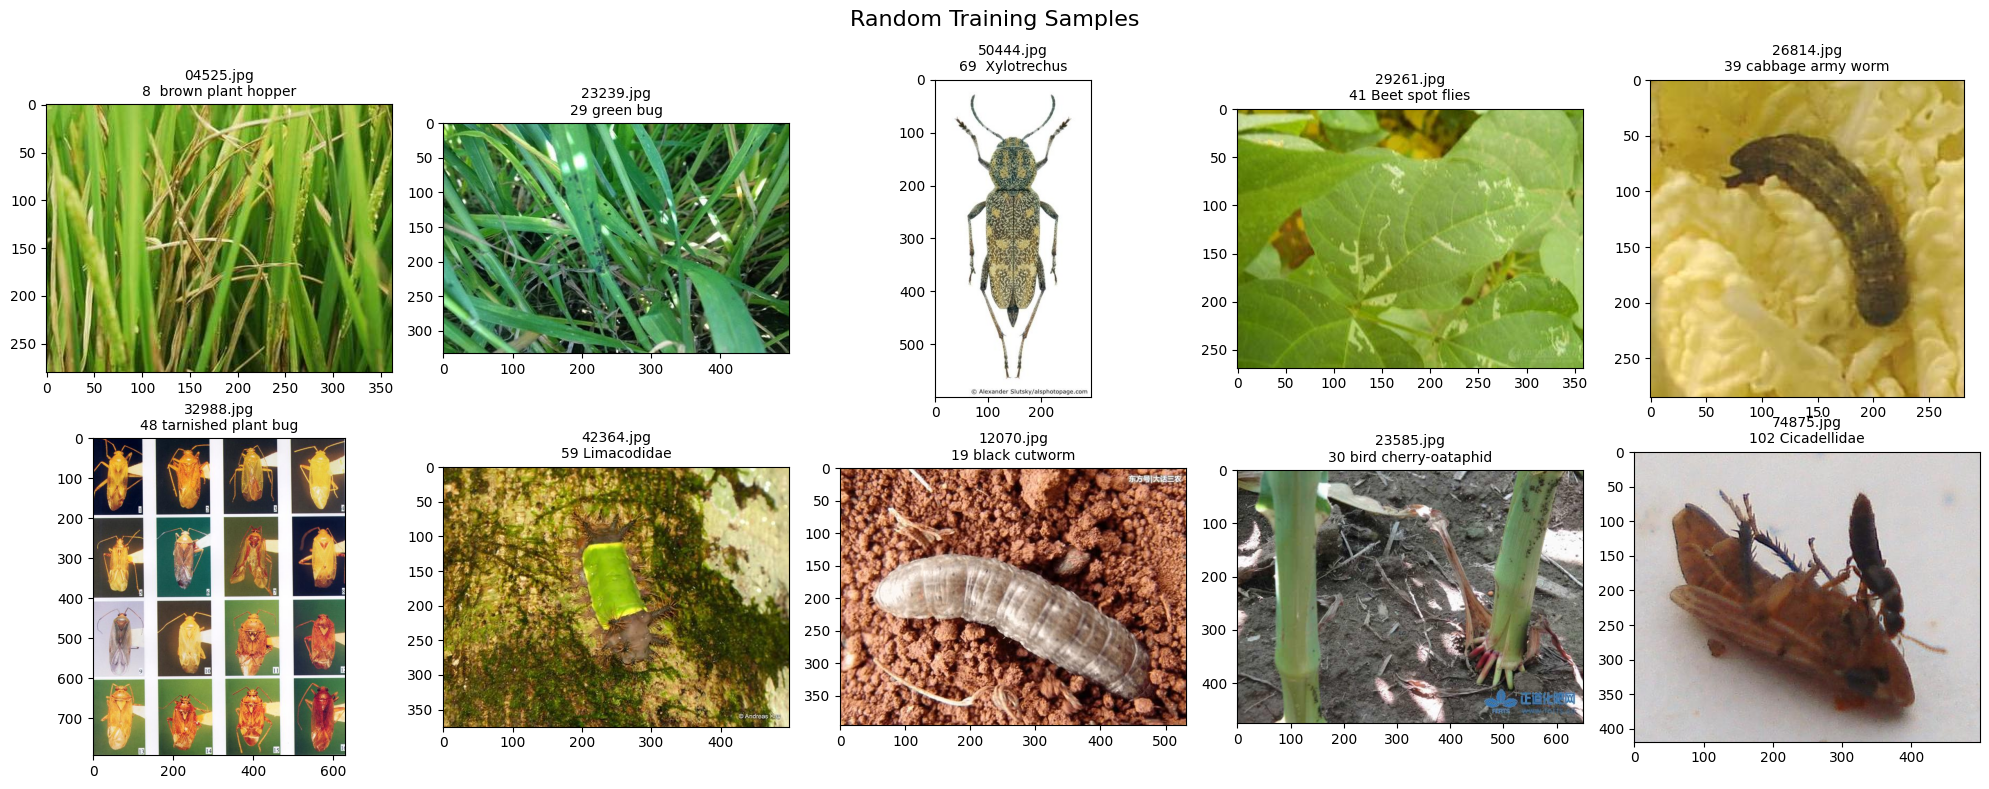

In [ ]:
import os
import random
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# ========== Path Configuration ==========
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")

train_file = os.path.join(ann_dir, "train.txt")
val_file = os.path.join(ann_dir, "val.txt")
test_file = os.path.join(ann_dir, "test.txt")
classes_file = os.path.join(ann_dir, "classes.txt")

# ========== Load Class Names ==========
with open(classes_file, 'r', encoding='utf-8') as f:
    class_names = [line.strip() for line in f.readlines()]

print(f"Total number of classes: {len(class_names)}")
print("Example classes (first 10):")
for i in range(10):
    print(f"{i:>2}: {class_names[i]}")

# ========== Load Training Labels ==========
with open(train_file, 'r') as f:
    train_data = [line.strip().split() for line in f.readlines()]
    train_filenames, train_labels = zip(*train_data)
    train_labels = list(map(int, train_labels))

# ========== Count Label Distribution ==========
label_counter = Counter(train_labels)
label_df = pd.DataFrame({
    "ClassID": list(label_counter.keys()),
    "Count": list(label_counter.values()),
    "ClassName": [class_names[i] for i in label_counter.keys()]
}).sort_values("Count", ascending=False)
label_df.head()

# ========== Plot: Class Distribution ==========
plt.figure(figsize=(20, 6))
plt.bar(label_df["ClassName"], label_df["Count"])
plt.xticks(rotation=90)
plt.title("Train Set: Class Distribution")
plt.xlabel("Insect Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ========== Random Sample Visualization ==========
N = 10
sample_indices = random.sample(range(len(train_filenames)), N)
plt.figure(figsize=(20, 8))

for idx, sample_idx in enumerate(sample_indices):
    fname = train_filenames[sample_idx]
    label = train_labels[sample_idx]
    img_path = os.path.join(image_dir, fname)

    image = Image.open(img_path).convert("RGB")

    plt.subplot(2, 5, idx + 1)
    plt.imshow(image)
    plt.title(f"{fname}\n{class_names[label]}", fontsize=10)
    # plt.axis("off")

plt.suptitle("Random Training Samples", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch

# ========== Path Setup ==========
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")

train_file = os.path.join(ann_dir, "train.txt")
val_file = os.path.join(ann_dir, "val.txt")
test_file = os.path.join(ann_dir, "test.txt")

# ========== Utility Function: Load Annotation Files ==========
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

# ========== Custom PyTorch Dataset ==========
class IP102Dataset(Dataset):
    def __init__(self, filenames, labels, image_dir, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        label = self.labels[idx]
        img_path = os.path.join(self.image_dir, img_name)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# ========== Define Transforms ==========
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ========== Load Train / Val / Test Sets ==========
train_filenames, train_labels = load_annotations(train_file)
val_filenames, val_labels = load_annotations(val_file)
test_filenames, test_labels = load_annotations(test_file)

train_dataset = IP102Dataset(train_filenames, train_labels, image_dir, transform=train_transform)
val_dataset = IP102Dataset(val_filenames, val_labels, image_dir, transform=val_transform)
test_dataset = IP102Dataset(test_filenames, test_labels, image_dir, transform=val_transform)

# ========== Wrap as DataLoaders ==========
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"Train size: {len(train_dataset)} | Val size: {len(val_dataset)} | Test size: {len(test_dataset)}")

Train size: 45095 | Val size: 7508 | Test size: 22619


In [ ]:
import os
from PIL import Image
from tqdm import tqdm

# ========== Path Setup ==========
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
train_file = os.path.join(ann_dir, "train.txt")

# ========== Load Train Filenames ==========
with open(train_file, 'r') as f:
    train_data = [line.strip().split() for line in f.readlines()]
    train_filenames, train_labels = zip(*train_data)
    train_filenames = list(train_filenames)

# ========== Check for Corrupted or Unreadable Images ==========
bad_images = []

for fname in tqdm(train_filenames, desc="Checking images"):
    try:
        img = Image.open(os.path.join(image_dir, fname)).convert("RGB")
    except:
        bad_images.append(fname)

print(f"Bad images found: {len(bad_images)}")
if bad_images:
    print("Example bad image(s):", bad_images[:5])
else:
    print("All training images are valid.")

Checking images: 100%|██████████| 45095/45095 [01:32<00:00, 485.16it/s]

Bad images found: 0
All training images are valid.


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
from datetime import datetime

# ========== Path Setup ==========
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
train_file = os.path.join(ann_dir, "train.txt")
val_file = os.path.join(ann_dir, "val.txt")

# ========== Load Annotations ==========
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

class IP102Dataset(Dataset):
    def __init__(self, filenames, labels, image_dir, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        label = self.labels[idx]
        img_path = os.path.join(self.image_dir, img_name)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# ========== Transforms ==========
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ========== Initialize DataLoaders ==========
train_filenames, train_labels = load_annotations(train_file)
val_filenames, val_labels = load_annotations(val_file)

train_dataset = IP102Dataset(train_filenames, train_labels, image_dir, transform=train_transform)
val_dataset = IP102Dataset(val_filenames, val_labels, image_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

# ========== Initialize ResNet50 ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 102)
model = model.to(device)

# ========== Loss, Optimizer, Scheduler ==========
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# ========== Train and Validate Functions ==========
def train(model, loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), correct / total

def validate(model, loader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), correct / total

# ========== Training Loop ==========
start_time = datetime.now()
num_epochs = 10
best_val_acc = 0.0
save_path = os.path.join(base_path, "outputs", "resnet50_best.pth")

for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}/{num_epochs}")

    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)
    scheduler.step()

    print(f" Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f" Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(" Best model saved.")

print(f"\nTraining finished. Best validation accuracy: {best_val_acc:.4f}")
print(f"Total Time: {datetime.now() - start_time}")

Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 205MB/s]



Epoch 1/10


 Train Loss: 1.9698 | Acc: 0.5129
 Val   Loss: 1.3364 | Acc: 0.6300
 Best model saved.

Epoch 2/10


 Train Loss: 1.1031 | Acc: 0.6896
 Val   Loss: 1.1666 | Acc: 0.6708
 Best model saved.

Epoch 3/10


 Train Loss: 0.8090 | Acc: 0.7614
 Val   Loss: 1.1271 | Acc: 0.6926
 Best model saved.

Epoch 4/10


 Train Loss: 0.6106 | Acc: 0.8161
 Val   Loss: 1.1420 | Acc: 0.6954
 Best model saved.

Epoch 5/10


 Train Loss: 0.4597 | Acc: 0.8581
 Val   Loss: 1.1696 | Acc: 0.7007
 Best model saved.

Epoch 6/10


 Train Loss: 0.2585 | Acc: 0.9229
 Val   Loss: 1.0949 | Acc: 0.7240
 Best model saved.

Epoch 7/10


 Train Loss: 0.1932 | Acc: 0.9443
 Val   Loss: 1.1314 | Acc: 0.7282
 Best model saved.

Epoch 8/10


 Train Loss: 0.1559 | Acc: 0.9559
 Val   Loss: 1.1398 | Acc: 0.7276

Epoch 9/10


 Train Loss: 0.1293 | Acc: 0.9625
 Val   Loss: 1.1851 | Acc: 0.7282

Epoch 10/10


 Train Loss: 0.1087 | Acc: 0.9709
 Val   Loss: 1.1930 | Acc: 0.7302
 Best model saved.

Training finished. Best validation accuracy: 0.7302
Total Time: 1:56:48.100029


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from tqdm import tqdm

# ======== Path Setup ========
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
model_path = os.path.join(base_path, "pretrained_models", "resnet50_0.497.pkl")
test_file = os.path.join(ann_dir, "test.txt")

# ======== Load Annotations ========
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

# ======== Dataset Class ========
class IP102Dataset(Dataset):
    def __init__(self, filenames, labels, image_dir, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        label = self.labels[idx]
        img_path = os.path.join(self.image_dir, img_name)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# ======== Define Transform ========
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ======== Load Test Data ========
test_filenames, test_labels = load_annotations(test_file)
test_dataset = IP102Dataset(test_filenames, test_labels, image_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# ======== Load ResNet50 ========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = models.resnet50()
model.fc = nn.Linear(model.fc.in_features, 102)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ======== Evaluate Accuracy ========
correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Evaluating"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_acc = correct / total
print(f"\nTest Accuracy of resnet50_0.497.pkl: {test_acc:.4f}")

Using device: cuda


Evaluating: 100%|██████████| 707/707 [02:39<00:00,  4.45it/s]


Test Accuracy of resnet50_0.497.pkl: 0.5031


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
from datetime import datetime

# Path Setup
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
train_file = os.path.join(ann_dir, "train.txt")
val_file = os.path.join(ann_dir, "val.txt")

# Load Annotations
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

# Dataset Definition
class IP102Dataset(Dataset):
    def __init__(self, filenames, labels, image_dir, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        label = self.labels[idx]
        img_path = os.path.join(self.image_dir, img_name)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Build DataLoaders
train_filenames, train_labels = load_annotations(train_file)
val_filenames, val_labels = load_annotations(val_file)

train_dataset = IP102Dataset(train_filenames, train_labels, image_dir, transform=train_transform)
val_dataset = IP102Dataset(val_filenames, val_labels, image_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

# Load DenseNet121
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 102)
model = model.to(device)

# Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Train and Validate
def train(model, loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), correct / total

def validate(model, loader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss / len(loader), correct / total

# Training Loop
num_epochs = 10
best_val_acc = 0.0
save_path = os.path.join(base_path, "outputs", "densenet121_best.pth")

start_time = datetime.now()
for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}/{num_epochs}")

    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)
    scheduler.step()

    print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"\nTraining finished. Best validation accuracy: {best_val_acc:.4f}")
print(f"Total Time: {datetime.now() - start_time}")

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


Using device: cuda


100%|██████████| 30.8M/30.8M [00:00<00:00, 193MB/s]



Epoch 1/10


Train Loss: 2.2049 | Acc: 0.4781
Val   Loss: 1.5348 | Acc: 0.5911
Best model saved.

Epoch 2/10


Train Loss: 1.3410 | Acc: 0.6426
Val   Loss: 1.2951 | Acc: 0.6468
Best model saved.

Epoch 3/10


Train Loss: 1.0337 | Acc: 0.7142
Val   Loss: 1.1963 | Acc: 0.6628
Best model saved.

Epoch 4/10


Train Loss: 0.8296 | Acc: 0.7613
Val   Loss: 1.1797 | Acc: 0.6745
Best model saved.

Epoch 5/10


Train Loss: 0.6711 | Acc: 0.8041
Val   Loss: 1.1784 | Acc: 0.6815
Best model saved.

Epoch 6/10


Train Loss: 0.4272 | Acc: 0.8794
Val   Loss: 1.0602 | Acc: 0.7094
Best model saved.

Epoch 7/10


Train Loss: 0.3529 | Acc: 0.9006
Val   Loss: 1.0591 | Acc: 0.7174
Best model saved.

Epoch 8/10


Train Loss: 0.3109 | Acc: 0.9162
Val   Loss: 1.0797 | Acc: 0.7166

Epoch 9/10


Train Loss: 0.2793 | Acc: 0.9262
Val   Loss: 1.0874 | Acc: 0.7147

Epoch 10/10


Train Loss: 0.2497 | Acc: 0.9351
Val   Loss: 1.0930 | Acc: 0.7190
Best model saved.

Training finished. Best validation accuracy: 0.7190
Total Time: 1:58:01.933134


In [ ]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from datetime import datetime
import timm

# Path Setup
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
train_file = os.path.join(ann_dir, "train.txt")
val_file = os.path.join(ann_dir, "val.txt")

# Load Annotations
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

# Dataset Definition
class IP102Dataset(Dataset):
    def __init__(self, filenames, labels, image_dir, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        label = self.labels[idx]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Build DataLoaders
train_filenames, train_labels = load_annotations(train_file)
val_filenames, val_labels = load_annotations(val_file)

train_dataset = IP102Dataset(train_filenames, train_labels, image_dir, transform=train_transform)
val_dataset = IP102Dataset(val_filenames, val_labels, image_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

# Load EfficientNet-B0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=102)
model = model.to(device)

# Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Train and Validate Functions
def train(model, loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), correct / total

def validate(model, loader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), correct / total

# Training Loop
num_epochs = 10
best_val_acc = 0.0
save_path = os.path.join(base_path, "outputs", "efficientnet_b0_best.pth")

start_time = datetime.now()
for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}/{num_epochs}")

    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)
    scheduler.step()

    print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"\nTraining finished. Best validation accuracy: {best_val_acc:.4f}")
print(f"Total Time: {datetime.now() - start_time}")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]


Epoch 1/10


Train Loss: 2.2775 | Acc: 0.4640
Val   Loss: 1.5329 | Acc: 0.5984
Best model saved.

Epoch 2/10


Train Loss: 1.2630 | Acc: 0.6642
Val   Loss: 1.3045 | Acc: 0.6476
Best model saved.

Epoch 3/10


Train Loss: 0.9063 | Acc: 0.7488
Val   Loss: 1.2254 | Acc: 0.6731
Best model saved.

Epoch 4/10


Train Loss: 0.6602 | Acc: 0.8112
Val   Loss: 1.2233 | Acc: 0.6846
Best model saved.

Epoch 5/10


Train Loss: 0.4839 | Acc: 0.8597
Val   Loss: 1.2499 | Acc: 0.6857
Best model saved.

Epoch 6/10


Train Loss: 0.2953 | Acc: 0.9218
Val   Loss: 1.2222 | Acc: 0.6969
Best model saved.

Epoch 7/10


Train Loss: 0.2547 | Acc: 0.9353
Val   Loss: 1.2265 | Acc: 0.6955

Epoch 8/10


Train Loss: 0.2303 | Acc: 0.9417
Val   Loss: 1.2450 | Acc: 0.6969

Epoch 9/10


Train Loss: 0.2103 | Acc: 0.9483
Val   Loss: 1.2512 | Acc: 0.6981
Best model saved.

Epoch 10/10


Train Loss: 0.1949 | Acc: 0.9527
Val   Loss: 1.2610 | Acc: 0.6985
Best model saved.

Training finished. Best validation accuracy: 0.6985
Total Time: 1:16:09.535891


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
from datetime import datetime

# Path Setup
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
train_file = os.path.join(ann_dir, "train.txt")
val_file = os.path.join(ann_dir, "val.txt")

# Load Annotations
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

# Dataset Definition
class IP102Dataset(Dataset):
    def __init__(self, filenames, labels, image_dir, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        label = self.labels[idx]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Build DataLoaders
train_filenames, train_labels = load_annotations(train_file)
val_filenames, val_labels = load_annotations(val_file)

train_dataset = IP102Dataset(train_filenames, train_labels, image_dir, transform=train_transform)
val_dataset = IP102Dataset(val_filenames, val_labels, image_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# Load MobileNetV2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 102)
model = model.to(device)

# Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Train and Validate
def train(model, loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), correct / total

def validate(model, loader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), correct / total

# Training Loop
num_epochs = 10
best_val_acc = 0.0
save_path = os.path.join(base_path, "outputs", "mobilenetv2_best.pth")

start_time = datetime.now()
for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}/{num_epochs}")

    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)
    scheduler.step()

    print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"\nTraining finished. Best validation accuracy: {best_val_acc:.4f}")
print(f"Total Time: {datetime.now() - start_time}")

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


Using device: cuda


100%|██████████| 13.6M/13.6M [00:00<00:00, 90.6MB/s]



Epoch 1/10


Train Loss: 2.5598 | Acc: 0.4039
Val   Loss: 1.7666 | Acc: 0.5436
Best model saved.

Epoch 2/10


Train Loss: 1.5981 | Acc: 0.5797
Val   Loss: 1.4510 | Acc: 0.6060
Best model saved.

Epoch 3/10


Train Loss: 1.2878 | Acc: 0.6481
Val   Loss: 1.3254 | Acc: 0.6387
Best model saved.

Epoch 4/10


Train Loss: 1.0837 | Acc: 0.6963
Val   Loss: 1.2557 | Acc: 0.6581
Best model saved.

Epoch 5/10


Train Loss: 0.9334 | Acc: 0.7368
Val   Loss: 1.2368 | Acc: 0.6682
Best model saved.

Epoch 6/10


Train Loss: 0.7453 | Acc: 0.7895
Val   Loss: 1.2034 | Acc: 0.6769
Best model saved.

Epoch 7/10


Train Loss: 0.7060 | Acc: 0.8001
Val   Loss: 1.1972 | Acc: 0.6771
Best model saved.

Epoch 8/10


Train Loss: 0.6825 | Acc: 0.8058
Val   Loss: 1.2037 | Acc: 0.6774
Best model saved.

Epoch 9/10


Train Loss: 0.6621 | Acc: 0.8124
Val   Loss: 1.1974 | Acc: 0.6791
Best model saved.

Epoch 10/10


Train Loss: 0.6479 | Acc: 0.8144
Val   Loss: 1.2030 | Acc: 0.6799
Best model saved.

Training finished. Best validation accuracy: 0.6799
Total Time: 0:32:12.633097


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from datetime import datetime
import timm

# Path Setup
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
train_file = os.path.join(ann_dir, "train.txt")
val_file = os.path.join(ann_dir, "val.txt")

# Load Annotations
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

# Dataset Definition
class IP102Dataset(Dataset):
    def __init__(self, filenames, labels, image_dir, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_name = self.filenames[idx]
        label = self.labels[idx]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Compatible with both Swin and BEiT
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load datasets
train_filenames, train_labels = load_annotations(train_file)
val_filenames, val_labels = load_annotations(val_file)

train_dataset = IP102Dataset(train_filenames, train_labels, image_dir, transform=train_transform)
val_dataset = IP102Dataset(val_filenames, val_labels, image_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

# DualStream Fusion Model
class DualStreamModel(nn.Module):
    def __init__(self, num_classes=102):
        super(DualStreamModel, self).__init__()
        self.swin = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=0, global_pool='avg')
        self.beit = timm.create_model('beit_base_patch16_224', pretrained=True, num_classes=0, global_pool='avg')

        swin_out = self.swin.num_features
        beit_out = self.beit.num_features
        fusion_dim = swin_out + beit_out

        self.fusion = nn.Sequential(
            nn.Linear(fusion_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        swin_feat = self.swin(x)#extractor
        beit_feat = self.beit(x)
        combined = torch.cat([swin_feat, beit_feat], dim=1)#fuse
        return self.fusion(combined)

# Build model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = DualStreamModel().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training functions
def train(model, loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(loader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), correct / total

def validate(model, loader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return running_loss / len(loader), correct / total

# Training loop
num_epochs = 10
best_val_acc = 0.0
save_path = os.path.join(base_path, "outputs", "dualstream_swin_beit_best.pth")

start_time = datetime.now()
for epoch in range(1, num_epochs + 1):
    print(f"\nEpoch {epoch}/{num_epochs}")
    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)
    scheduler.step()

    print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print("Best model saved.")

print(f"\nTraining finished. Best validation accuracy: {best_val_acc:.4f}")
print(f"Total Time: {datetime.now() - start_time}")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/350M [00:00<?, ?B/s]


Epoch 1/10


Train Loss: 1.9129 | Acc: 0.5433
Val   Loss: 1.2336 | Acc: 0.6616
Best model saved.

Epoch 2/10


Train Loss: 1.0067 | Acc: 0.7211
Val   Loss: 1.0172 | Acc: 0.7116
Best model saved.

Epoch 3/10


Train Loss: 0.7041 | Acc: 0.7956
Val   Loss: 0.9685 | Acc: 0.7266
Best model saved.

Epoch 4/10


Train Loss: 0.4958 | Acc: 0.8527
Val   Loss: 0.9911 | Acc: 0.7312
Best model saved.

Epoch 5/10


Train Loss: 0.3501 | Acc: 0.8937
Val   Loss: 1.0182 | Acc: 0.7318
Best model saved.

Epoch 6/10


Train Loss: 0.1813 | Acc: 0.9490
Val   Loss: 0.9893 | Acc: 0.7471
Best model saved.

Epoch 7/10


Train Loss: 0.1331 | Acc: 0.9633
Val   Loss: 1.0149 | Acc: 0.7497
Best model saved.

Epoch 8/10


Train Loss: 0.1056 | Acc: 0.9732
Val   Loss: 1.0246 | Acc: 0.7517
Best model saved.

Epoch 9/10


Train Loss: 0.0855 | Acc: 0.9795
Val   Loss: 1.0513 | Acc: 0.7521
Best model saved.

Epoch 10/10


Train Loss: 0.0699 | Acc: 0.9837
Val   Loss: 1.0767 | Acc: 0.7523
Best model saved.

Training finished. Best validation accuracy: 0.7523
Total Time: 1:30:14.088363


In [ ]:
import os
import torch
import torch.nn as nn
import timm
import torchvision.models as models
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score

# Base paths
base_path = "/content/COMP9444/COMP9444IP102_project"
image_dir = os.path.join(base_path, "images")
ann_dir = os.path.join(base_path, "annotations")
outputs_dir = os.path.join(base_path, "outputs")
test_file = os.path.join(ann_dir, "test.txt")
class_file = os.path.join(ann_dir, "classes.txt")

# Load class names
with open(class_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
num_classes = len(classes)

# Load test annotations
def load_annotations(file_path):
    with open(file_path, 'r') as f:
        data = [line.strip().split() for line in f.readlines()]
        filenames, labels = zip(*data)
        labels = list(map(int, labels))
    return list(filenames), labels

test_filenames, test_labels = load_annotations(test_file)

# Dataset definition
class TestDataset(Dataset):
    def __init__(self, filenames, labels, transform=None):
        self.filenames = filenames
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(image_dir, self.filenames[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx], self.filenames[idx]

# Image transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Dataloader
test_dataset = TestDataset(test_filenames, test_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Model loading
def load_model(path, arch_name, num_classes):
    if arch_name == "resnet50":
        model = models.resnet50(weights=None)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif arch_name == "densenet121":
        model = models.densenet121(weights=None)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif arch_name == "efficientnet_b0":
        model = timm.create_model('efficientnet_b0', pretrained=False, num_classes=num_classes)
    elif arch_name == "mobilenetv2":
        model = models.mobilenet_v2(weights=None)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif arch_name == "dualstream":
        class DualStreamModel(nn.Module):
            def __init__(self, num_classes=102):
                super(DualStreamModel, self).__init__()
                self.swin = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=0, global_pool='avg')
                self.beit = timm.create_model('beit_base_patch16_224', pretrained=False, num_classes=0, global_pool='avg')
                fusion_dim = self.swin.num_features + self.beit.num_features
                self.fusion = nn.Sequential(
                    nn.Linear(fusion_dim, 512),
                    nn.ReLU(),
                    nn.Dropout(0.3),
                    nn.Linear(512, num_classes)
                )

            def forward(self, x):
                swin_feat = self.swin(x)
                beit_feat = self.beit(x)
                combined = torch.cat([swin_feat, beit_feat], dim=1)
                return self.fusion(combined)
        model = DualStreamModel(num_classes)
    else:
        raise ValueError("Unknown architecture")

    model.load_state_dict(torch.load(path, map_location='cpu'))
    return model

# Evaluate function
def evaluate_model(model, device):
    model.to(device)
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels, _ in tqdm(test_loader, desc="Evaluating", leave=False):
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels)
    acc = accuracy_score(all_labels, all_preds)
    return acc, all_preds, all_labels

# Evaluation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = {}

model_files = {
    "ResNet50": ("resnet50_best.pth", "resnet50"),
    "DenseNet121": ("densenet121_best.pth", "densenet121"),
    "EfficientNet_B0": ("efficientnet_b0_best.pth", "efficientnet_b0"),
    "MobileNetV2": ("mobilenetv2_best.pth", "mobilenetv2"),
    "DualStream_Swin_BEiT": ("dualstream_swin_beit_best.pth", "dualstream")
}

for name, (filename, arch) in model_files.items():
    print(f"\nEvaluating {name} ...")
    path = os.path.join(outputs_dir, filename)
    model = load_model(path, arch, num_classes)
    acc, preds, labels = evaluate_model(model, device)
    results[name] = {
        "accuracy": acc,
        "predictions": preds,
        "ground_truth": labels
    }
    print(f"{name} Test Accuracy: {acc:.4f}")


Evaluating ResNet50 ...


ResNet50 Test Accuracy: 0.6906

Evaluating DenseNet121 ...


DenseNet121 Test Accuracy: 0.6778

Evaluating EfficientNet_B0 ...


EfficientNet_B0 Test Accuracy: 0.6338

Evaluating MobileNetV2 ...


MobileNetV2 Test Accuracy: 0.6172

Evaluating DualStream_Swin_BEiT ...


DualStream_Swin_BEiT Test Accuracy: 0.7516


==== Evaluating ResNet50 ====

Classification Report for ResNet50:
              precision    recall  f1-score   support

           0     0.7156    0.7134    0.7145       335
           1     0.4918    0.4082    0.4461       147
           2     0.2279    0.3924    0.2884        79
           3     0.5542    0.5665    0.5603       316
           4     0.5926    0.6316    0.6115       152
           5     0.7826    0.7105    0.7448       152
           6     0.4667    0.6306    0.5364       111
           7     0.4162    0.5538    0.4752       251
           8     0.4333    0.5336    0.4783       268
           9     0.3931    0.4096    0.4012       166
          10     0.6185    0.7821    0.6907       257
          11     0.3623    0.4098    0.3846       122
          12     0.6364    0.5385    0.5833        52
          13     0.4507    0.2602    0.3299       123
          14     0.8852    0.8372    0.8606       258
          15     0.9024    0.9717    0.9358       495
          16  

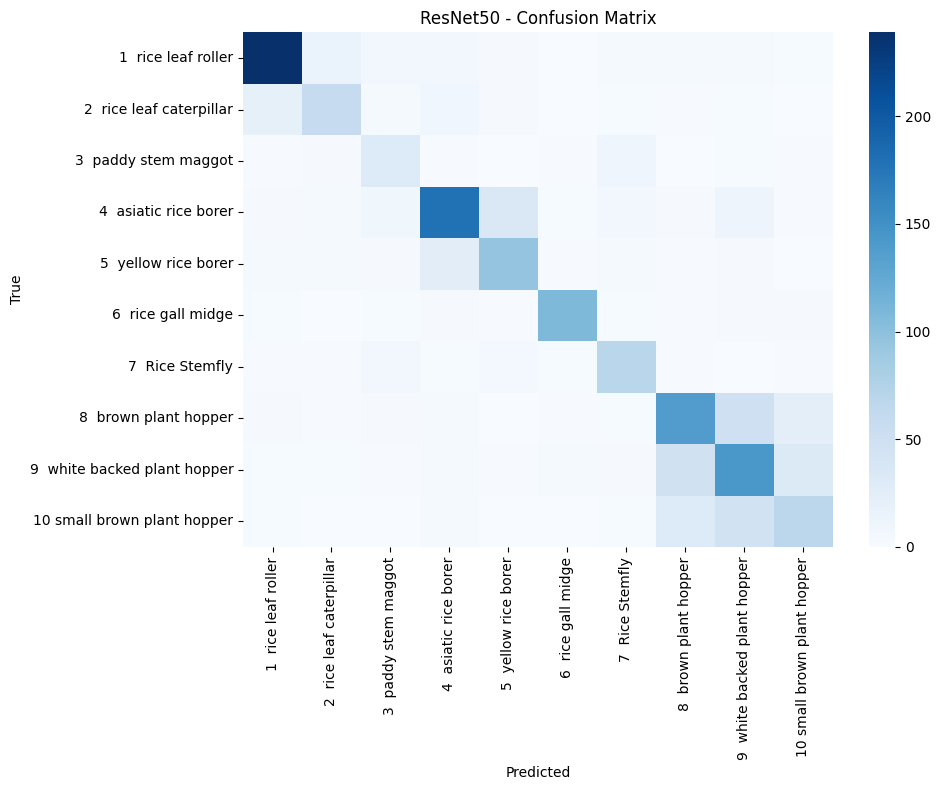

==== Evaluating DenseNet121 ====

Classification Report for DenseNet121:
              precision    recall  f1-score   support

           0     0.6851    0.7403    0.7116       335
           1     0.3492    0.4490    0.3929       147
           2     0.2750    0.2785    0.2767        79
           3     0.5296    0.5380    0.5338       316
           4     0.5322    0.5987    0.5635       152
           5     0.7669    0.6711    0.7158       152
           6     0.3692    0.6486    0.4706       111
           7     0.4646    0.4183    0.4403       251
           8     0.3892    0.5896    0.4688       268
           9     0.4624    0.2590    0.3320       166
          10     0.4814    0.8054    0.6026       257
          11     0.5054    0.3852    0.4372       122
          12     0.5600    0.5385    0.5490        52
          13     0.4444    0.2927    0.3529       123
          14     0.8506    0.8605    0.8555       258
          15     0.9286    0.9717    0.9497       495
        

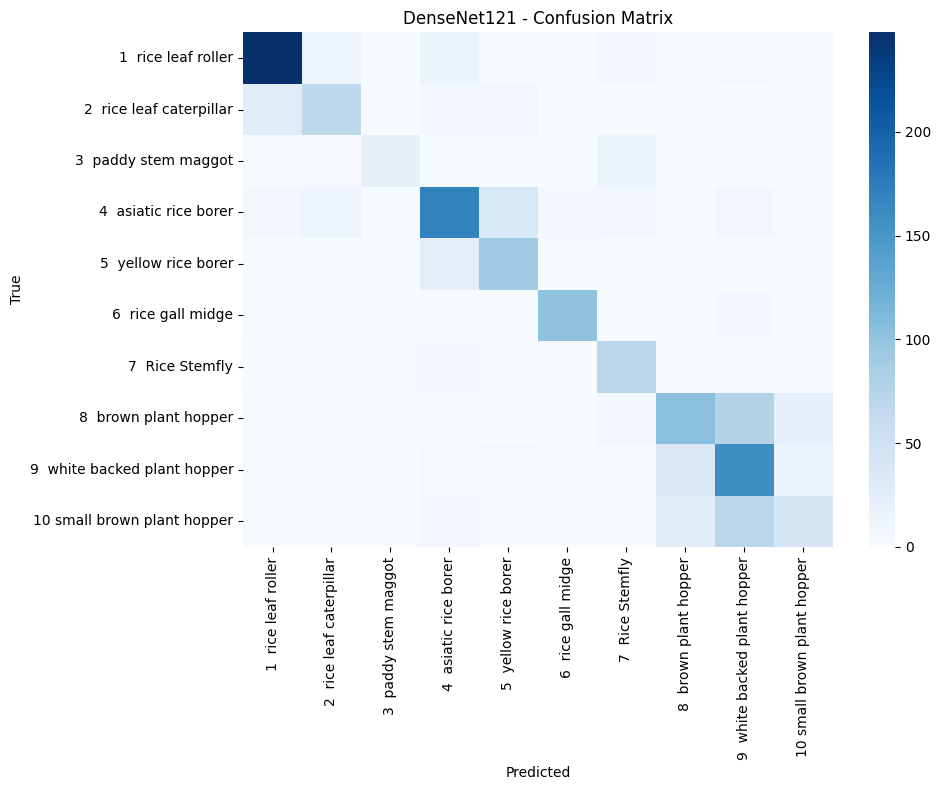

==== Evaluating EfficientNet_B0 ====

Classification Report for EfficientNet_B0:
              precision    recall  f1-score   support

           0     0.6335    0.7224    0.6750       335
           1     0.3934    0.3265    0.3569       147
           2     0.2794    0.2405    0.2585        79
           3     0.4903    0.4778    0.4840       316
           4     0.6212    0.5395    0.5775       152
           5     0.5321    0.5461    0.5390       152
           6     0.3711    0.5315    0.4370       111
           7     0.3574    0.4741    0.4075       251
           8     0.3556    0.4366    0.3920       268
           9     0.4074    0.3313    0.3654       166
          10     0.4390    0.7276    0.5476       257
          11     0.4091    0.3689    0.3879       122
          12     0.5128    0.3846    0.4396        52
          13     0.3889    0.2846    0.3286       123
          14     0.8750    0.8140    0.8434       258
          15     0.8286    0.9475    0.8841       495


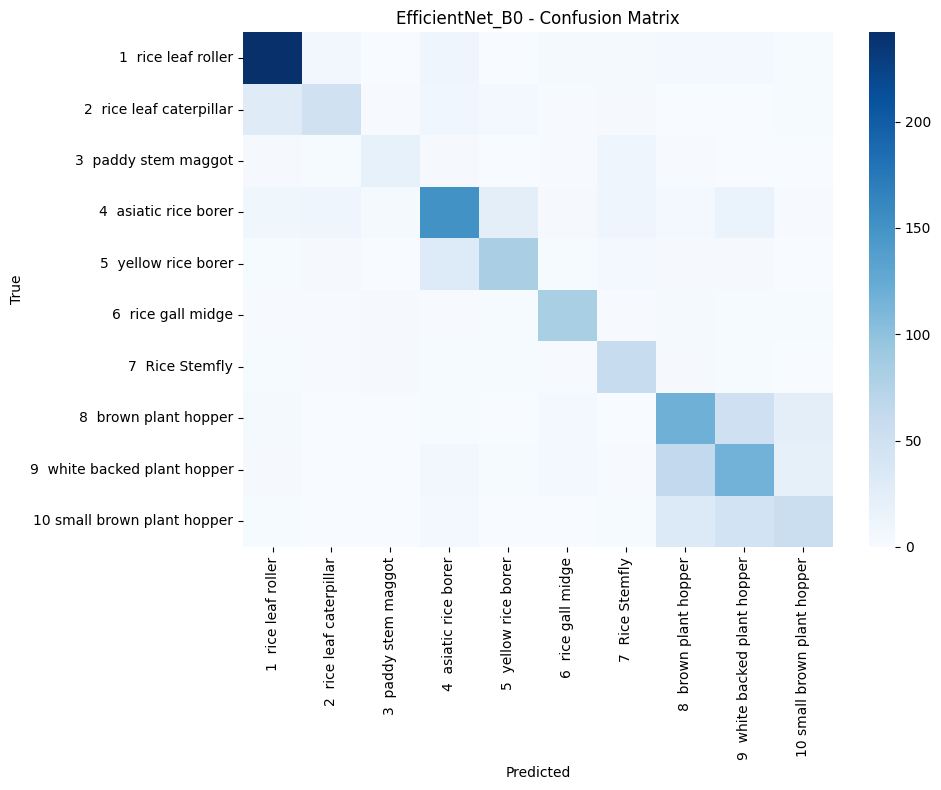

==== Evaluating MobileNetV2 ====

Classification Report for MobileNetV2:
              precision    recall  f1-score   support

           0     0.6388    0.7075    0.6714       335
           1     0.3136    0.2517    0.2792       147
           2     0.2000    0.1013    0.1345        79
           3     0.3789    0.6835    0.4876       316
           4     0.7129    0.4737    0.5692       152
           5     0.4630    0.6579    0.5435       152
           6     0.3497    0.5135    0.4161       111
           7     0.3783    0.5139    0.4358       251
           8     0.3796    0.4590    0.4155       268
           9     0.4578    0.2289    0.3052       166
          10     0.4598    0.7121    0.5588       257
          11     0.5932    0.2869    0.3867       122
          12     0.5641    0.4231    0.4835        52
          13     0.3469    0.1382    0.1977       123
          14     0.7464    0.7984    0.7715       258
          15     0.8585    0.9434    0.8989       495
        

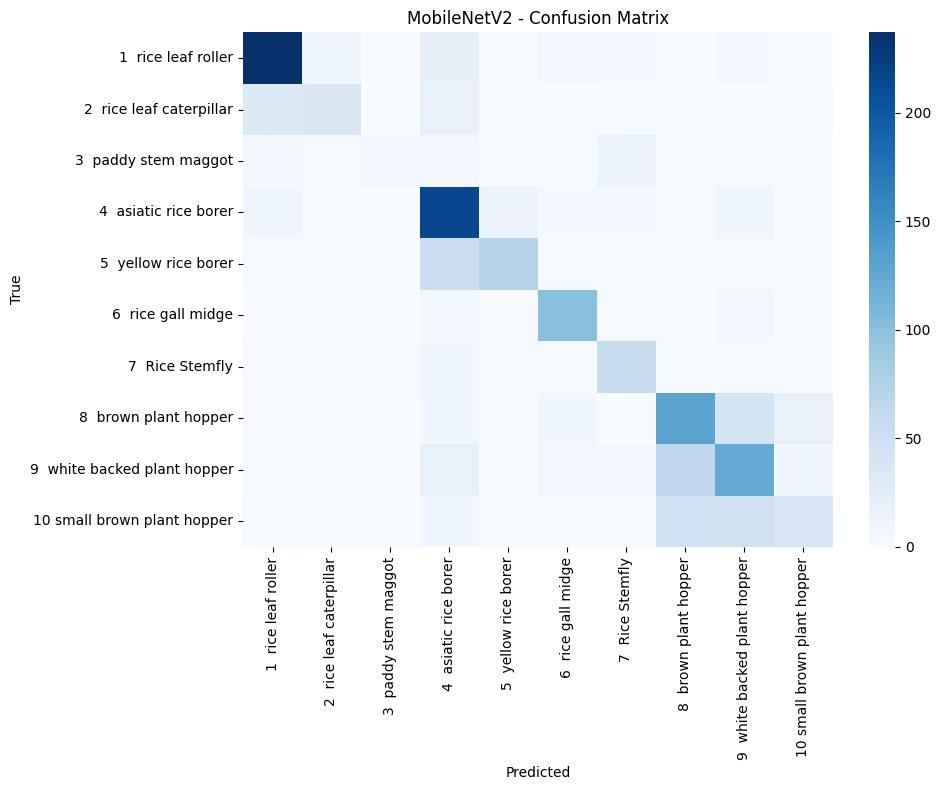

==== Evaluating DualStream_Swin_BEiT ====

Classification Report for DualStream_Swin_BEiT:
              precision    recall  f1-score   support

           0     0.6997    0.8000    0.7465       335
           1     0.4733    0.4830    0.4781       147
           2     0.5070    0.4557    0.4800        79
           3     0.5925    0.6487    0.6193       316
           4     0.6644    0.6382    0.6510       152
           5     0.8403    0.7961    0.8176       152
           6     0.6148    0.6757    0.6438       111
           7     0.5331    0.5777    0.5545       251
           8     0.5528    0.5075    0.5292       268
           9     0.5912    0.4880    0.5347       166
          10     0.8485    0.7626    0.8033       257
          11     0.5283    0.4590    0.4912       122
          12     0.5510    0.5192    0.5347        52
          13     0.4545    0.3659    0.4054       123
          14     0.8351    0.9031    0.8678       258
          15     0.9757    0.9737    0.9747 

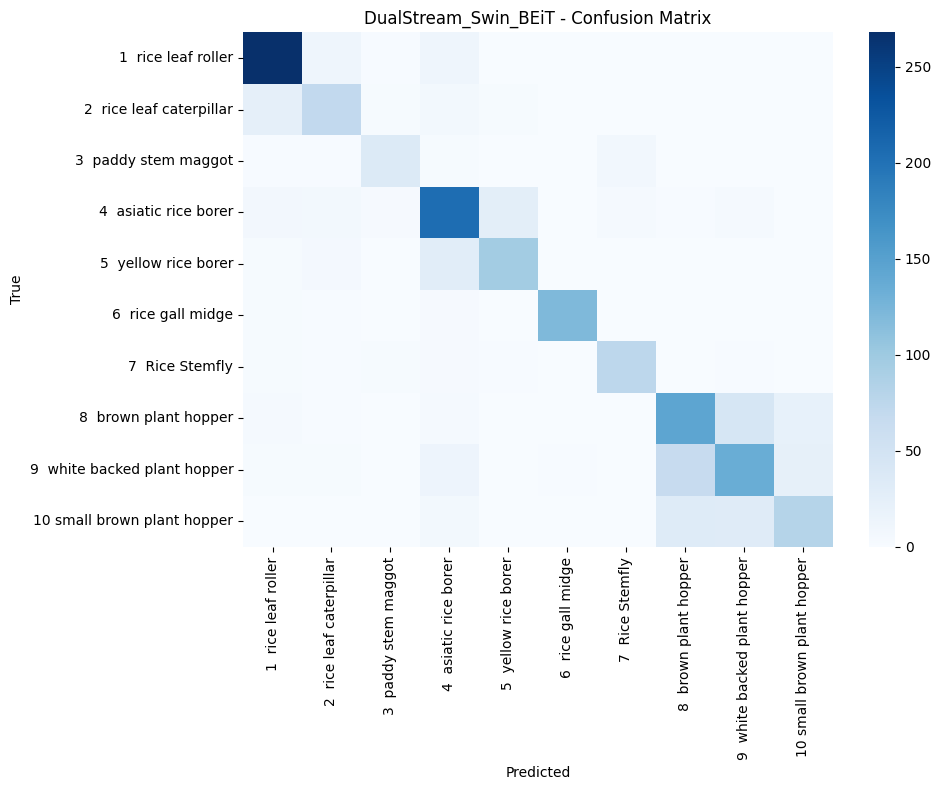

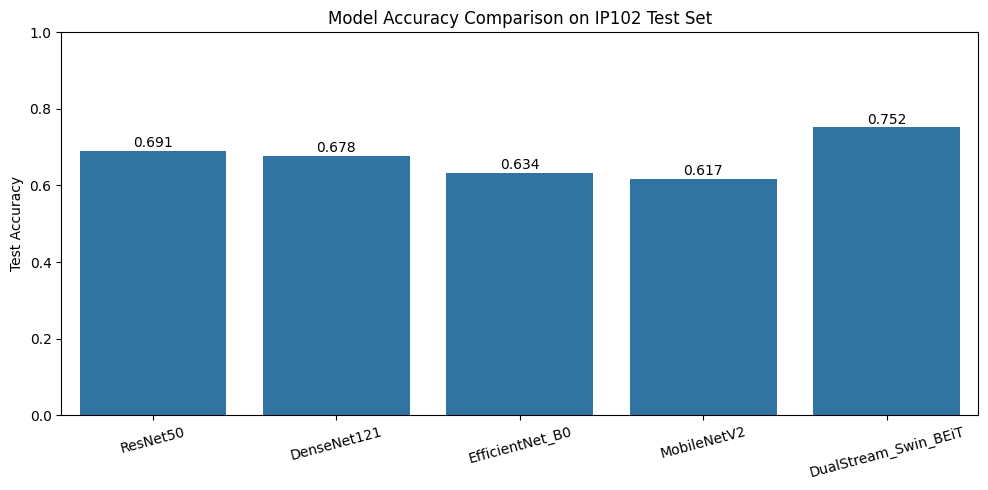

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Directory to save reports
output_dir = "/content/COMP9444/COMP9444IP102_project/outputs"

# Limit number of classes shown in heatmap
max_classes_to_show = 10  # Set to None to show all

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)
    if max_classes_to_show is not None and len(class_names) > max_classes_to_show:
        cm = cm[:max_classes_to_show, :max_classes_to_show]
        display_labels = class_names[:max_classes_to_show]
    else:
        display_labels = class_names

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{model_name.replace(' ', '_')}_confusion_matrix.png"))
    plt.show()

# Print and save classification report
def print_classification_report(y_true, y_pred, model_name):
    print(f"\nClassification Report for {model_name}:")
    report = classification_report(y_true, y_pred, digits=4)
    print(report)

    # Save to file
    report_path = os.path.join(output_dir, f"{model_name.replace(' ', '_')}_report.txt")
    with open(report_path, 'w') as f:
        f.write(f"Classification Report for {model_name}:\n")
        f.write(report)
    print(f"Saved classification report to {report_path}")

# Evaluate and plot per model
for model_name in results.keys():
    print(f"==== Evaluating {model_name} ====")
    preds = results[model_name]['predictions']
    labels = results[model_name]['ground_truth']

    print_classification_report(labels, preds, model_name)
    plot_confusion_matrix(labels, preds, classes, model_name)

# Accuracy bar chart
model_names = list(results.keys())
accuracies = [results[name]["accuracy"] for name in model_names]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Comparison on IP102 Test Set")
plt.xticks(rotation=15)

# Annotate values
for idx, acc in enumerate(accuracies):
    plt.text(idx, acc + 0.01, f"{acc:.3f}", ha='center')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "accuracy_comparison.png"))
plt.show()


Top 10 Per-Class Accuracy for ResNet50:
 15 | 16 mole cricket                | 97.17%
 73 | 74  Papilio xuthus             | 94.07%
 30 | 31 wheat blossom midge         | 93.84%
 58 | 59 Limacodidae                 | 91.92%
 62 | 63 oides decempunctata         | 91.76%
 56 | 57 Pieris canidia              | 90.78%
101 | 102 Cicadellidae               | 88.45%
 25 | 26 Potosiabre vitarsis         | 87.06%
 67 | 68 Lycorma delicatula          | 86.76%
 68 | 69  Xylotrechus                | 86.09%
Saved plot to /content/COMP9444/COMP9444IP102_project/outputs/ResNet50_top10_per_class_accuracy.png


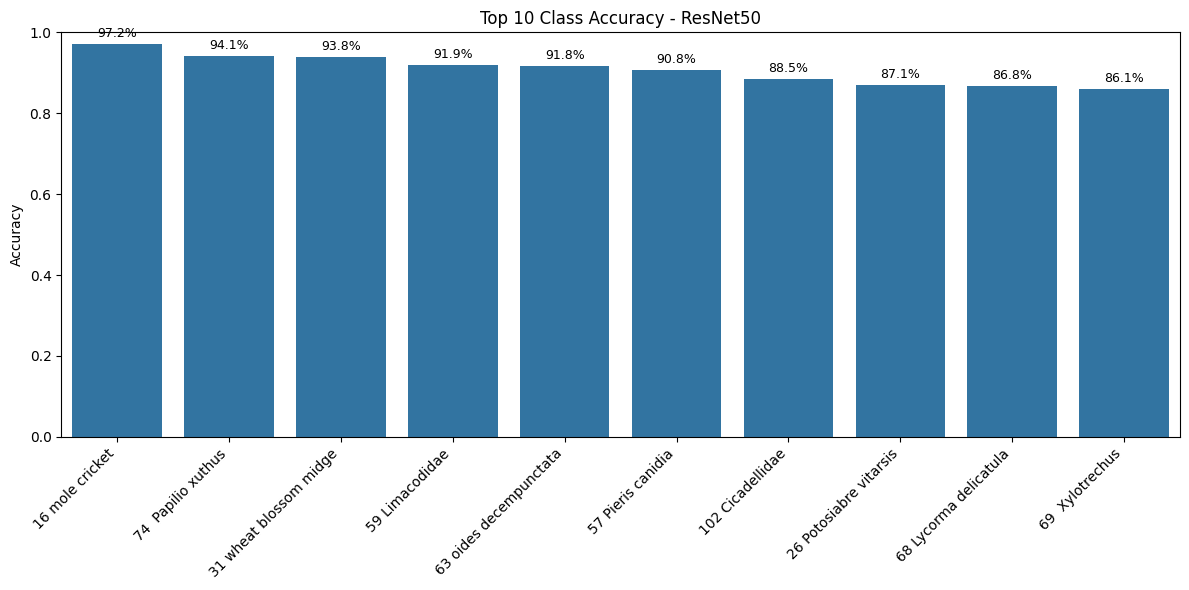


Top 10 Per-Class Accuracy for DenseNet121:
 15 | 16 mole cricket                | 97.17%
 30 | 31 wheat blossom midge         | 93.15%
 62 | 63 oides decempunctata         | 92.94%
 56 | 57 Pieris canidia              | 90.07%
 73 | 74  Papilio xuthus             | 89.63%
101 | 102 Cicadellidae               | 87.41%
 58 | 59 Limacodidae                 | 86.70%
 71 | 72  Trialeurodes vaporariorum  | 86.54%
 14 | 15 grub                        | 86.05%
 67 | 68 Lycorma delicatula          | 85.13%
Saved plot to /content/COMP9444/COMP9444IP102_project/outputs/DenseNet121_top10_per_class_accuracy.png


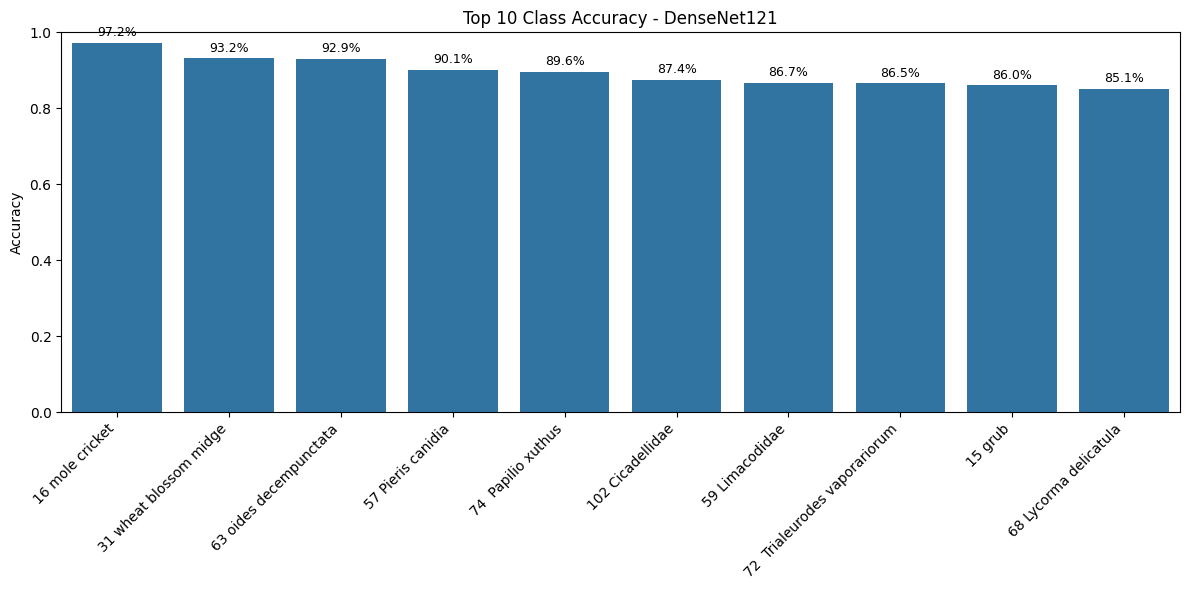


Top 10 Per-Class Accuracy for EfficientNet_B0:
 15 | 16 mole cricket                | 94.75%
 73 | 74  Papilio xuthus             | 91.11%
 56 | 57 Pieris canidia              | 90.07%
101 | 102 Cicadellidae               | 86.59%
 82 | 83  Aleurocanthus spiniferus   | 85.10%
 30 | 31 wheat blossom midge         | 84.93%
 62 | 63 oides decempunctata         | 84.71%
 67 | 68 Lycorma delicatula          | 82.31%
 70 | 71  Miridae                    | 81.97%
 68 | 69  Xylotrechus                | 81.45%
Saved plot to /content/COMP9444/COMP9444IP102_project/outputs/EfficientNet_B0_top10_per_class_accuracy.png


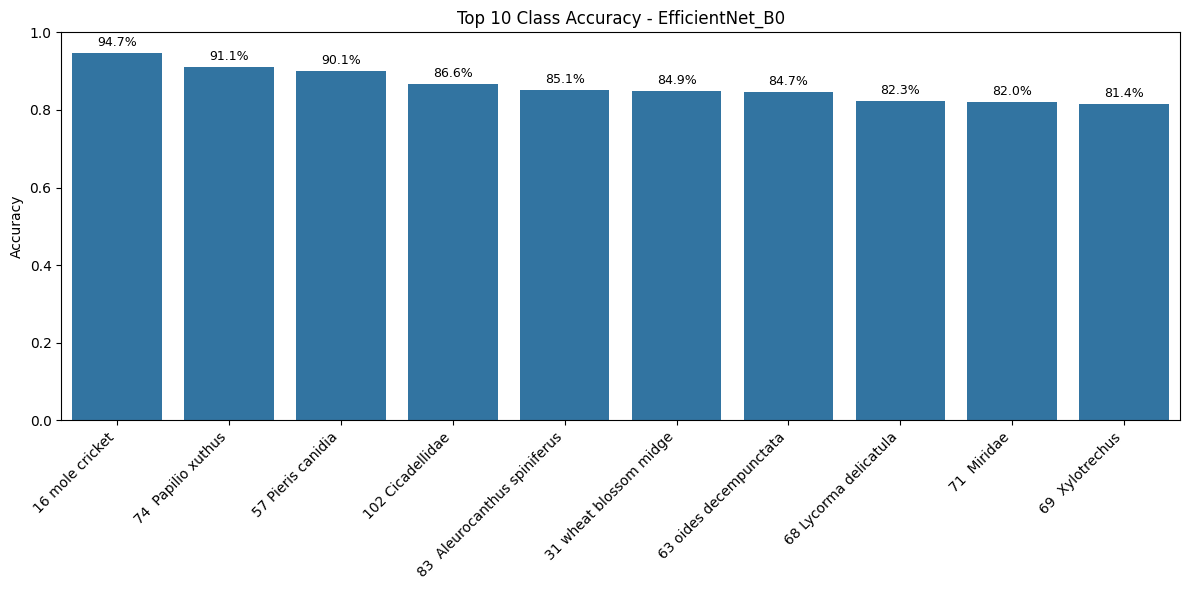


Top 10 Per-Class Accuracy for MobileNetV2:
 15 | 16 mole cricket                | 94.34%
 73 | 74  Papilio xuthus             | 90.37%
 62 | 63 oides decempunctata         | 88.24%
 56 | 57 Pieris canidia              | 87.23%
 70 | 71  Miridae                    | 85.38%
101 | 102 Cicadellidae               | 84.91%
 30 | 31 wheat blossom midge         | 83.56%
 67 | 68 Lycorma delicatula          | 81.99%
 58 | 59 Limacodidae                 | 81.24%
 68 | 69  Xylotrechus                | 80.00%
Saved plot to /content/COMP9444/COMP9444IP102_project/outputs/MobileNetV2_top10_per_class_accuracy.png


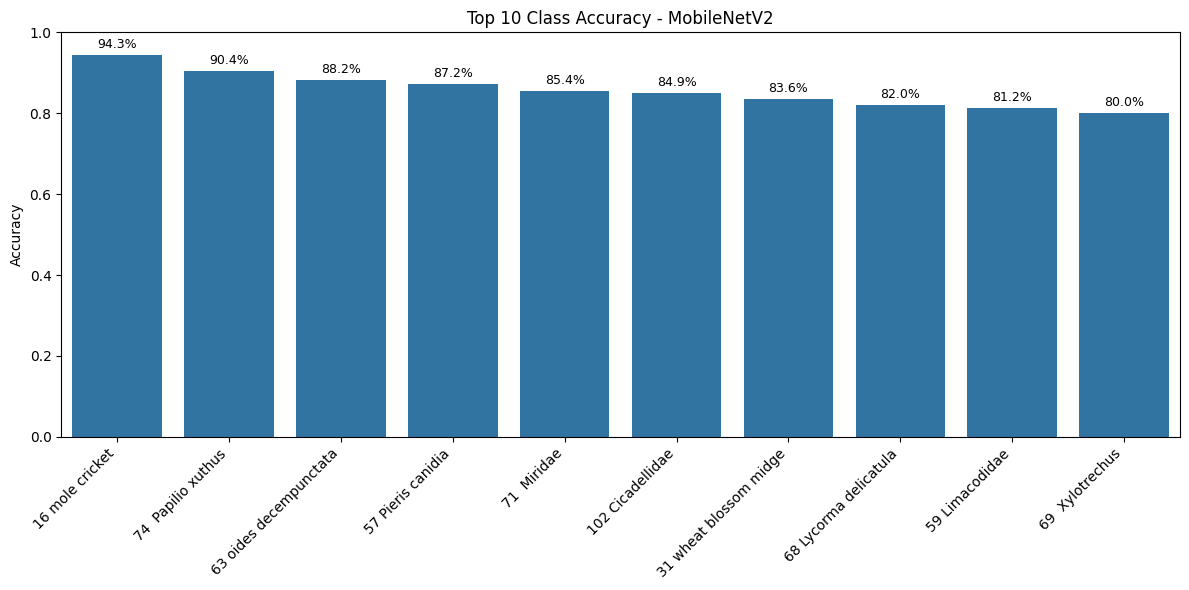


Top 10 Per-Class Accuracy for DualStream_Swin_BEiT:
 15 | 16 mole cricket                | 97.37%
 73 | 74  Papilio xuthus             | 97.04%
 62 | 63 oides decempunctata         | 96.47%
 48 | 49 Locustoidea                 | 95.94%
 30 | 31 wheat blossom midge         | 95.89%
 56 | 57 Pieris canidia              | 94.33%
 58 | 59 Limacodidae                 | 94.30%
 82 | 83  Aleurocanthus spiniferus   | 92.79%
 67 | 68 Lycorma delicatula          | 91.47%
 78 | 79  Ceroplastes rubens         | 91.03%
Saved plot to /content/COMP9444/COMP9444IP102_project/outputs/DualStream_Swin_BEiT_top10_per_class_accuracy.png


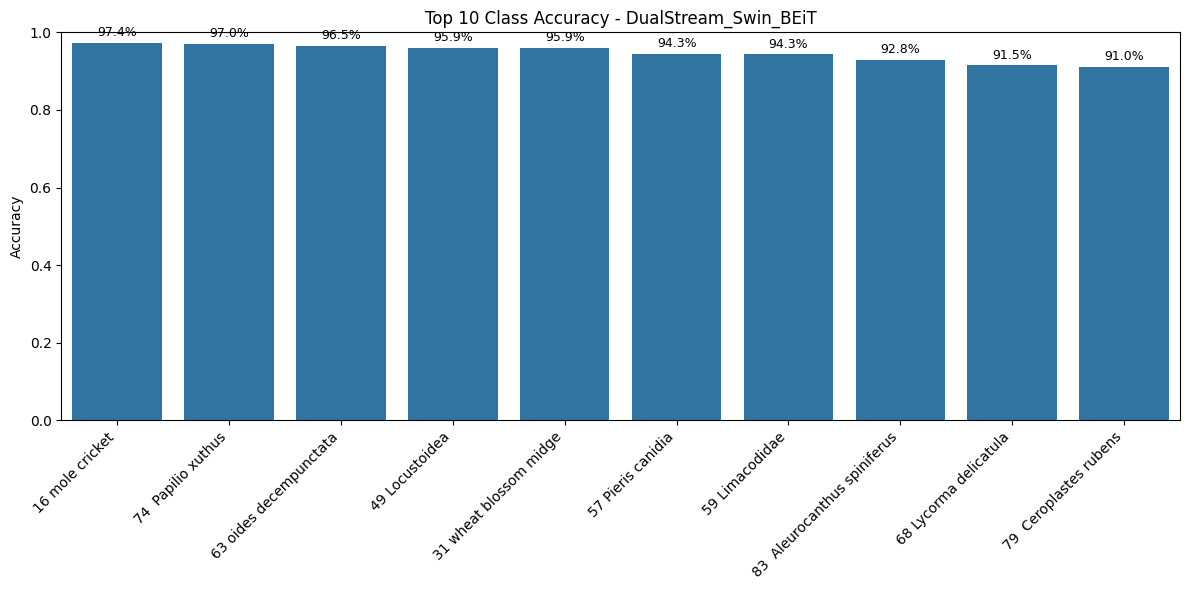

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.metrics import accuracy_score

# Base directory for saving outputs
output_dir = os.path.join(base_path, "outputs")
os.makedirs(output_dir, exist_ok=True)

# Function: compute per-class accuracy
def compute_per_class_accuracy(y_true, y_pred, num_classes):
    correct = [0] * num_classes
    total = [0] * num_classes
    for true, pred in zip(y_true, y_pred):
        total[true] += 1
        if true == pred:
            correct[true] += 1
    acc = [c / t if t > 0 else 0.0 for c, t in zip(correct, total)]
    return acc, correct, total

# Store per-class accuracy for each model
per_class_acc_dict = defaultdict(list)
for model_name in results.keys():
    y_true = results[model_name]['ground_truth']
    y_pred = results[model_name]['predictions']
    acc_list, _, _ = compute_per_class_accuracy(y_true, y_pred, len(classes))
    per_class_acc_dict[model_name] = acc_list

# Function: plot and save top-k per-class accuracy
def plot_per_class_accuracy(model_name, top_k=10):
    acc_list = per_class_acc_dict[model_name]
    acc_np = np.array(acc_list)
    sorted_indices = np.argsort(acc_np)[::-1][:top_k]
    top_acc = acc_np[sorted_indices]
    top_classes = [classes[i] for i in sorted_indices]

    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x=top_classes, y=top_acc)
    plt.ylim(0, 1)
    plt.ylabel("Accuracy")
    plt.title(f"Top {top_k} Class Accuracy - {model_name}")
    plt.xticks(rotation=45, ha='right')

    # Annotate bars with accuracy values
    for bar, acc in zip(bars.patches, top_acc):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                 f"{acc * 100:.1f}%", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()

    # Save to file
    filename = f"{model_name.replace(' ', '_')}_top{top_k}_per_class_accuracy.png"
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path)
    print(f"Saved plot to {save_path}")
    plt.show()

# Function: print top-k per-class accuracy as table
def print_per_class_accuracy_table(model_name, top_k=10):
    acc_list = per_class_acc_dict[model_name]
    sorted_indices = np.argsort(acc_list)[::-1][:top_k]
    print(f"\nTop {top_k} Per-Class Accuracy for {model_name}:")
    for i in sorted_indices:
        print(f"{i:3d} | {classes[i]:30s} | {acc_list[i]*100:.2f}%")

# Run for all models
for model_name in results.keys():
    print_per_class_accuracy_table(model_name, top_k=10)
    plot_per_class_accuracy(model_name, top_k=10)

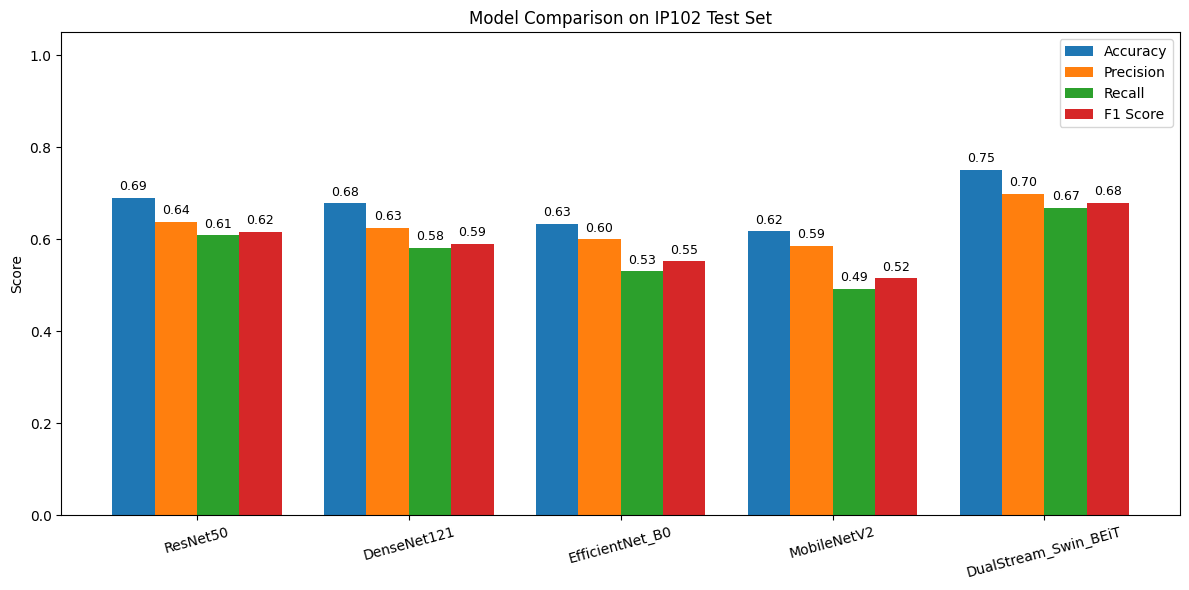

Annotated comparison plot saved to: /content/COMP9444/COMP9444IP102_project/outputs/model_comparison_all_metrics_annotated.png


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Score containers
scores = {
    'Accuracy': {},
    'Precision': {},
    'Recall': {},
    'F1 Score': {}
}

# Compute scores
for model_name in results.keys():
    y_true = results[model_name]['ground_truth']
    y_pred = results[model_name]['predictions']

    scores['Accuracy'][model_name] = accuracy_score(y_true, y_pred)
    scores['Precision'][model_name] = precision_score(y_true, y_pred, average='macro', zero_division=0)
    scores['Recall'][model_name] = recall_score(y_true, y_pred, average='macro', zero_division=0)
    scores['F1 Score'][model_name] = f1_score(y_true, y_pred, average='macro')

# Prepare plot data
model_names = list(results.keys())
x = np.arange(len(model_names))
bar_width = 0.2

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['C0', 'C1', 'C2', 'C3']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    values = [scores[metric][m] for m in model_names]
    bar = plt.bar(x + (i - 1.5) * bar_width, values, bar_width, label=metric, color=colors[i])

    # Add value labels on each bar
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height + 0.01,
                 f"{height:.2f}", ha='center', va='bottom', fontsize=9)

plt.xticks(x, model_names, rotation=15)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Model Comparison on IP102 Test Set")
plt.legend()
plt.tight_layout()

# Save to file
output_dir = "/content/COMP9444/COMP9444IP102_project/outputs"
os.makedirs(output_dir, exist_ok=True)
plot_path = os.path.join(output_dir, "model_comparison_all_metrics_annotated.png")
plt.savefig(plot_path)
plt.show()

print(f"Annotated comparison plot saved to: {plot_path}")

Selected image: 52148.jpg


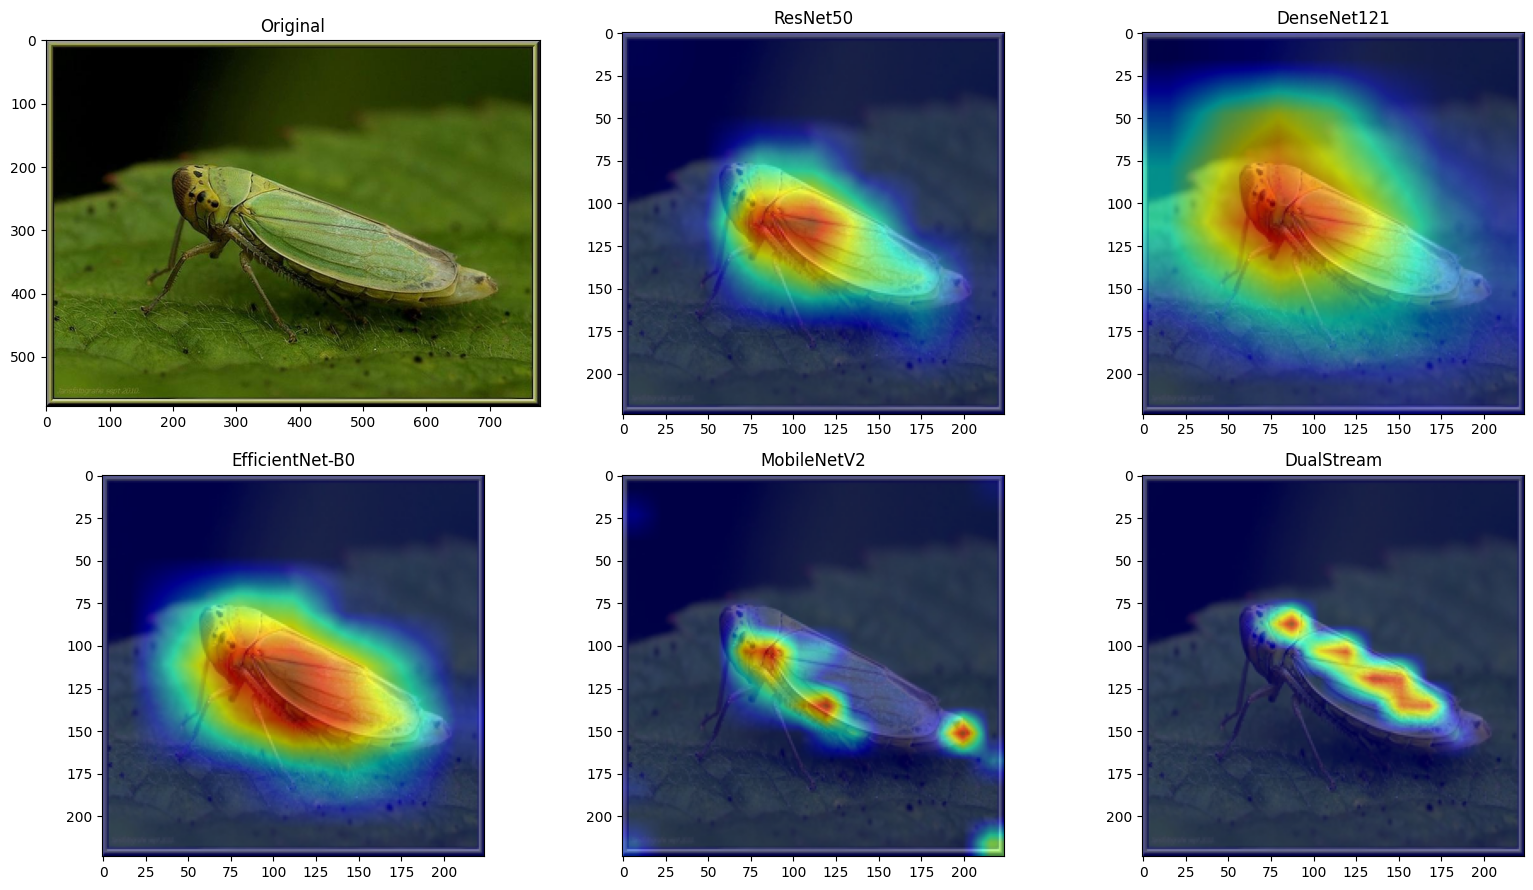

In [ ]:
import os
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import models, transforms
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import timm
import torch.nn as nn

# Paths
base_path = "/content/COMP9444/COMP9444IP102_project"
img_dir = os.path.join(base_path, "images")
outputs_dir = os.path.join(base_path, "outputs")
classes_txt = os.path.join(base_path, "annotations/classes.txt")

# Load class labels
with open(classes_txt, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
num_classes = len(classes)

# Select a random image
img_files = os.listdir(img_dir)
random.seed(42)
img_name = random.choice(img_files)
img_path = os.path.join(img_dir, img_name)
print(f"Selected image: {img_name}")

# Transform image for model input
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
raw_img = Image.open(img_path).convert("RGB")
input_tensor = transform(raw_img).unsqueeze(0).cuda()
input_np = np.array(raw_img.resize((224, 224))) / 255.0

# Store Grad-CAM results
heatmaps = {}

# ResNet50 with GradCAM++
resnet = models.resnet50(weights=None)
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)
resnet.load_state_dict(torch.load(os.path.join(outputs_dir, "resnet50_best.pth")))
resnet.eval().cuda()
with torch.no_grad():
    top1 = resnet(input_tensor).argmax(dim=1).item()
cam = GradCAMPlusPlus(model=resnet, target_layers=[resnet.layer4[-1]])
grayscale_cam = cam(input_tensor, [ClassifierOutputTarget(top1)])[0]
heatmaps["ResNet50"] = show_cam_on_image(input_np, grayscale_cam, use_rgb=True)

# DenseNet121 with GradCAM++
densenet = models.densenet121(weights=None)
densenet.classifier = nn.Linear(densenet.classifier.in_features, num_classes)
densenet.load_state_dict(torch.load(os.path.join(outputs_dir, "densenet121_best.pth")))
densenet.eval().cuda()
with torch.no_grad():
    top1 = densenet(input_tensor).argmax(dim=1).item()
cam = GradCAMPlusPlus(model=densenet, target_layers=[densenet.features[-1]])
grayscale_cam = cam(input_tensor, [ClassifierOutputTarget(top1)])[0]
heatmaps["DenseNet121"] = show_cam_on_image(input_np, grayscale_cam, use_rgb=True)

# EfficientNet-B0 with GradCAM++
efficientnet = timm.create_model("efficientnet_b0", pretrained=False, num_classes=num_classes)
efficientnet.load_state_dict(torch.load(os.path.join(outputs_dir, "efficientnet_b0_best.pth")))
efficientnet.eval().cuda()
with torch.no_grad():
    top1 = efficientnet(input_tensor).argmax(dim=1).item()
cam = GradCAMPlusPlus(model=efficientnet, target_layers=[efficientnet.conv_head])
grayscale_cam = cam(input_tensor, [ClassifierOutputTarget(top1)])[0]
heatmaps["EfficientNet-B0"] = show_cam_on_image(input_np, grayscale_cam, use_rgb=True)

# MobileNetV2 with regular GradCAM
mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier[1] = nn.Linear(mobilenet.classifier[1].in_features, num_classes)
mobilenet.load_state_dict(torch.load(os.path.join(outputs_dir, "mobilenetv2_best.pth")))
mobilenet.eval().cuda()
with torch.no_grad():
    top1 = mobilenet(input_tensor).argmax(dim=1).item()
cam = GradCAM(model=mobilenet, target_layers=[mobilenet.features[7]])
grayscale_cam = cam(input_tensor, [ClassifierOutputTarget(top1)])[0]
heatmaps["MobileNetV2"] = show_cam_on_image(input_np, grayscale_cam, use_rgb=True)

# DualStream definition
class DualStreamModel(nn.Module):
    def __init__(self, num_classes=102):
        super().__init__()
        self.swin = timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=0, global_pool='avg')
        self.beit = timm.create_model('beit_base_patch16_224', pretrained=False, num_classes=0, global_pool='avg')
        self.fusion = nn.Sequential(
            nn.Linear(self.swin.num_features + self.beit.num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        s = self.swin(x)
        b = self.beit(x)
        return self.fusion(torch.cat([s, b], dim=1))

# DualStream using BEiT patch embedding + GradCAM++
dualstream = DualStreamModel(num_classes)
dualstream.load_state_dict(torch.load(os.path.join(outputs_dir, "dualstream_swin_beit_best.pth")))
dualstream.eval().cuda()
with torch.no_grad():
    top1 = dualstream(input_tensor).argmax(dim=1).item()

# Use BEiT patch embedding conv layer (safe) + GradCAM++
target_layers = [dualstream.beit.patch_embed.proj]
cam = GradCAMPlusPlus(model=dualstream, target_layers=target_layers)
grayscale_cam = cam(input_tensor, [ClassifierOutputTarget(top1)])[0]
heatmaps["DualStream"] = show_cam_on_image(input_np, grayscale_cam, use_rgb=True)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()
axes[0].imshow(raw_img)
axes[0].set_title("Original")
# axes[0].axis("off")

for i, (name, heatmap) in enumerate(heatmaps.items(), start=1):
    axes[i].imshow(heatmap)
    axes[i].set_title(name)
    # axes[i].axis("off")

for j in range(len(heatmaps) + 1, 6):
    axes[j].axis("off")

plt.tight_layout()
save_path = os.path.join(outputs_dir, "gradcam_comparison.png")
plt.savefig(save_path)
plt.show()